In [1]:
#importing the libaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
sns.set()

In [2]:
#import the data
home_df = pd.read_csv("HomeC.csv")

c:\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Understanding the dataset

In [3]:
#printing top 5 rows of my dataframe to have an idea about the data
home_df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
#printing the rows and columns of the data
home_df.shape

(503911, 32)

In [5]:
#Printing all columns
home_df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [6]:
#Checking datatypes of the columns
home_df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

# Removing Data Entry Errors

In [7]:
#As seen above the time column is an object whereas it should be in datetime.
#Dropping the original time column and replacing with a new one, Time Stamp, with the corrected datatype 
time_index = pd.date_range('2016-01-01 05:00', periods=len(home_df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_df['Time Stamp'] = time_index
home_df = home_df.drop(['time'], axis=1)
home_df.iloc[np.r_[0:5,-5:0]].iloc[:,0]

0         0.932833
1         0.934333
2         0.931817
3         1.022050
4         1.139400
503906    1.599333
503907    1.924267
503908    1.978200
503909    1.990950
503910         NaN
Name: use [kW], dtype: float64

In [8]:
#Changing the datatypes of the column cloud cover to float
home_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
home_df['cloudCover'] = home_df['cloudCover'].astype('float')
home_df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59,
        nan])

<AxesSubplot:>

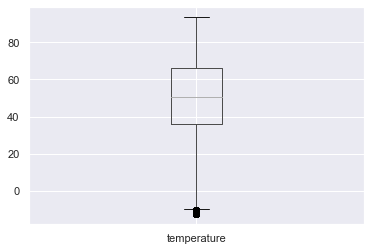

In [10]:
#Plotting box plot to check for outliers
home_df.boxplot(column='temperature', sym='o', return_type='axes')

Time Stamp      1      2      3      4     5      6      7      8      9   \
temperature  28.72  30.47  42.42  46.51  61.4  68.05  73.18  72.56  59.96   

Time Stamp      10     11     12  
temperature  47.92  36.55  28.67  


<AxesSubplot:>

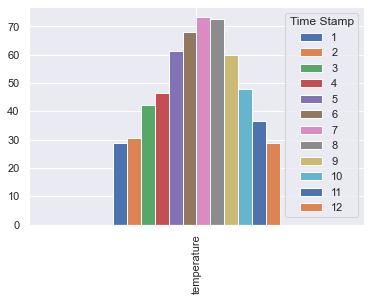

In [30]:
#Finding the average monthly temperature value 
Month = []
Month = home_df['Time Stamp'].apply(lambda x: x.month)
avg_monthly_temp = home_df.pivot_table(columns=Month, values='temperature', aggfunc='mean').round(2)
print(avg_monthly_temp)
avg_monthly_temp.plot.bar()

The above two plots are used to identify and understand the temperature variation throughout the year. 
The first one i.e. the box plot presents the 5 number summary of the temperature. 
The second one i.e. the bar chart finds out the trends in temperature over the months. It can be seen that the May-September is the summer season and it is warmer while in the remaining months are winters. 

# Dealing with Missing values and removing unnecessary columns and rows

In [12]:
#Dropping the Furnace 1 and Furnace 2 column and replacing it with the aggregated Furnace column
home_df['Furnace'] = home_df[['Furnace 1 [kW]','Furnace 2 [kW]']].sum(axis=1)

home_df = home_df.drop(['Furnace 1 [kW]','Furnace 2 [kW]'], axis=1)

In [13]:
#Dropping the Kitchen 12, Kitchen 14 and Kitchen 38 column and replacing it with the sum and avg Kitchen column
home_df['sum_Kitchen'] = home_df[['Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']].sum(axis=1)

home_df = home_df.drop(['Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]'],axis=1)

In [14]:
home_df.columns

Index(['use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]', 'temperature', 'icon', 'humidity',
       'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'Time Stamp', 'Furnace', 'sum_Kitchen'],
      dtype='object')

<AxesSubplot:>

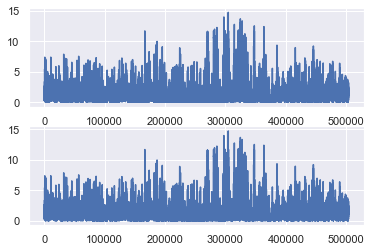

In [15]:
#Analyzing the trends in Total energy used and the overall house energy 
fig, axes = plt.subplots(nrows=2, ncols=1)
home_df['use [kW]'].plot(ax=axes[0])
home_df['House overall [kW]'].plot(ax=axes[1])

In [16]:
#checking if both the columns are identicial
home_df['use [kW]'].equals(home_df['House overall [kW]'])

True

The above two plots were plotted to observe the trends in the values of energy used and the overall house energy used. It can be seen that both follow the exact same pattern. 
This observation was further confirmed by using the .equals function, which confirms that both the columns are identical.
Hence dropping the House overall column to reduce redundancy.

In [17]:
#Dropping House overall column for the above mentioned reason.
home_df = home_df.drop(['House overall [kW]'], axis=1)

In [18]:
home_df.isnull().sum()

use [kW]               1
gen [kW]               1
Dishwasher [kW]        1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
Time Stamp             0
Furnace                0
sum_Kitchen            0
dtype: int64

In [19]:
#Dropping the missing rows since there is only 1 row with missing values
home_df = home_df.drop(home_df[home_df['use [kW]'].isnull()].index)

In [20]:
home_df.isnull().sum()

use [kW]               0
gen [kW]               0
Dishwasher [kW]        0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Time Stamp             0
Furnace                0
sum_Kitchen            0
dtype: int64

# Anova Test

Here I'm conducting anova test on my two main KPIs i.e., Used, Generated and since anova is between one categorical and one numercial column I'll be conducting it with the categorical column Icon and summary which are the only other categorical column in this dataset.

In [21]:
y = home_df['use [kW]']
model = ols('y ~ C(Q("icon"))', data=home_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Used [KW] - Icon")
display(anova_table)

model = ols('y ~ C(Q("summary"))', data=home_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Used [KW] - summary")
display(anova_table)


Anova => Used [KW] - Icon


,sum_sq,df,F,PR(>F)
"C(Q(""icon""))",497.184470,8.0,55.547171,6.515651e-91
Residual,563781.530931,503901.0,NaN,NaN



Anova => Used [KW] - summary


,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",1462.918537,17.0,77.044636,8.493588e-268
Residual,562815.796864,503892.0,NaN,NaN


In [22]:
y = home_df['gen [kW]']
model = ols('y ~ C(Q("icon"))', data=home_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Generated [KW] - Icon")
display(anova_table)

model = ols('y ~ C(Q("summary"))', data=home_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Generated [KW] - summary")
display(anova_table)


Anova => Generated [KW] - Icon


,sum_sq,df,F,PR(>F)
"C(Q(""icon""))",25.483047,8.0,193.718321,0.0
Residual,8285.827508,503901.0,NaN,NaN



Anova => Generated [KW] - summary


,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",32.160311,17.0,115.139148,0.0
Residual,8279.150244,503892.0,NaN,NaN


# Chi-squared test

Since chi squared test can only be performed on categorical columns so here I'm using the only two categorical columns availbe in this datast i.e., summary and icon

In [23]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

data_crosstab = pd.crosstab(home_df['icon'], home_df['summary'], 
margins = False) 
print(data_crosstab) 

stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

summary              Breezy  Breezy and Mostly Cloudy  \
icon                                                    
clear-day                 0                         0   
clear-night               0                         0   
cloudy                    0                         0   
fog                       0                         0   
partly-cloudy-day         0                         0   
partly-cloudy-night       0                         0   
rain                      0                         0   
snow                      0                         0   
wind                   1561                        58   

summary              Breezy and Partly Cloudy   Clear  Drizzle  Dry  Flurries  \
icon                                                                            
clear-day                                   0  182194        0   58         0   
clear-night                                 0  194536        0    0         0   
cloudy                                      0   

# Corelation Matrix

<AxesSubplot:>

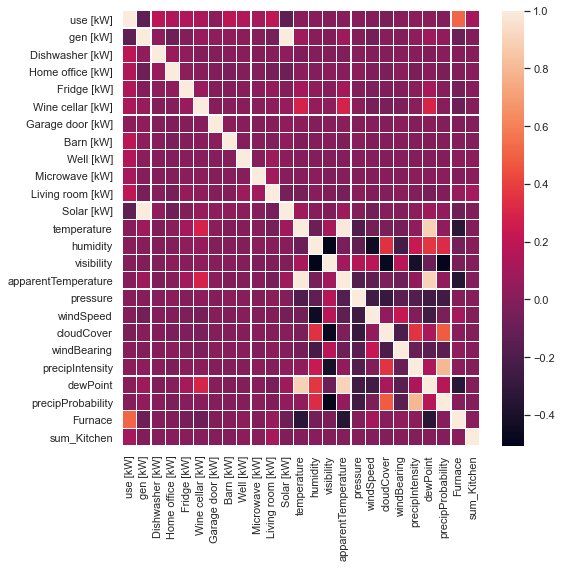

In [26]:
#let us check the correlation of all numerical columns with each other
corrmatrix = home_df.corr()
f, axis = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmatrix, ax = axis, linewidths = 0.2)

This heatmap shows the correlation of all numerical values with each other. 
From this heatmap we can clearly identify that energy generated is highly positively correlated with Solar.
Apart from that no major consclusions can be drawn due to the large number of columns which causes difficulty in finding relations.

For this reason plotting correlataion matrices separately for each KPI with the 15 highest related columns

<AxesSubplot:>

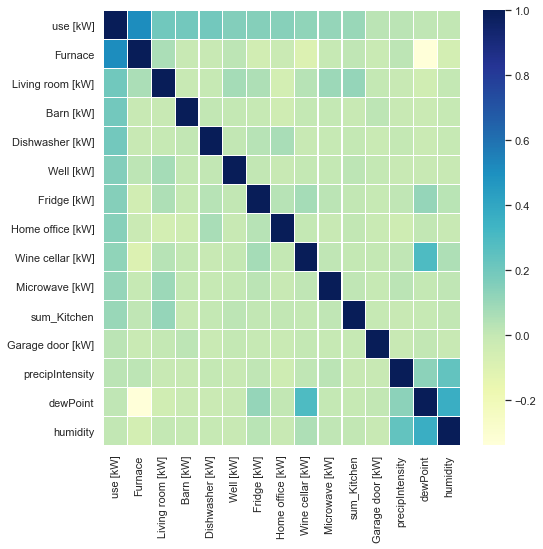

In [27]:
# let us plot a correlation matrix only for Use (v vars with largest correlation with grand total)
v= 15

cols = corrmatrix.nlargest(v, 'use [kW]')['use [kW]'].index 
  
coeffs = np.corrcoef(home_df[cols].values.T) 
f, axis = plt.subplots(figsize =(8, 8)) 
  
sns.heatmap(coeffs, ax = axis, cmap ="YlGnBu", 
            linewidths = 0.2, yticklabels = cols.values,  
                              xticklabels = cols.values) 

It can be clearly seen here that the most energy that is being used is by the Furnace as it is highly positively related with energy used.

<AxesSubplot:>

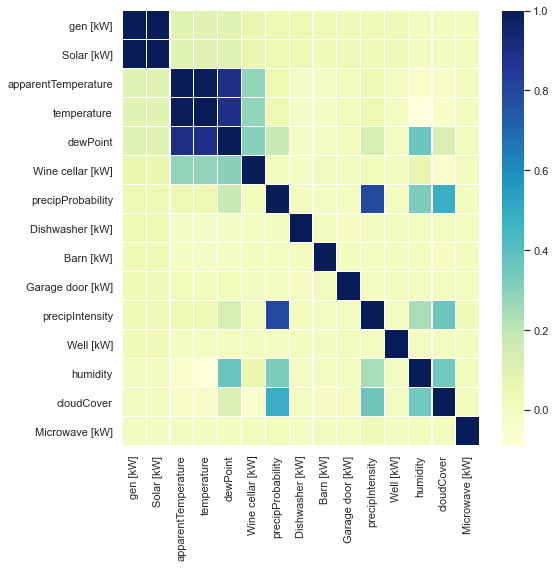

In [28]:
# let us plot a correlation matrix only for saleprice (v vars with largest correlation with grand total)
v=15

cols = corrmatrix.nlargest(v, 'gen [kW]')['gen [kW]'].index 
  
coeffs = np.corrcoef(home_df[cols].values.T) 
f, axis = plt.subplots(figsize =(8, 8)) 
  
sns.heatmap(coeffs, ax = axis, cmap ="YlGnBu", 
            linewidths = 0.2, yticklabels = cols.values,  
                              xticklabels = cols.values) 

This heatmap shows that generation of energy is more dependant upon the weather conditions majorly the solar energy which again makes sense as well.

In [29]:
home_df.to_csv('home_data.clean.csv')